In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_08/data/FIFA22_official_data.csv'
df = pd.read_csv(url)

df.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


zadanie 1

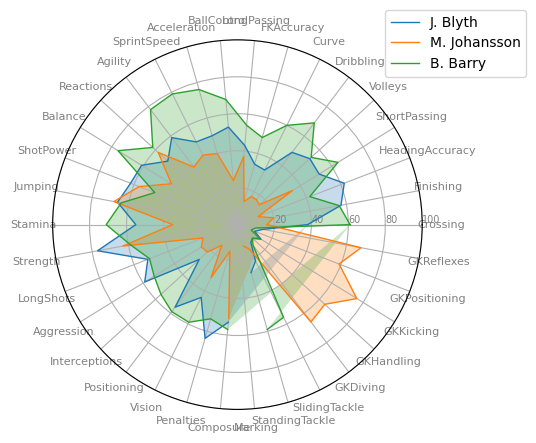

In [ ]:
def radar_chart(df):
    categories = list(df.columns[1:])
    N = len(categories)

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)

    for i in range(len(df)):
        values = df.iloc[i, 1:].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.iloc[i, 0])
        ax.fill(angles, values, alpha=0.25)

    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=7)
    plt.ylim(0, 100)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

selected_columns = ['Name', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

num_players = 3
selected_players_df = df[selected_columns].sample(n=num_players)


radar_chart(selected_players_df)


zadanie 2

In [6]:
import
path = '/content/pkn.txt'
df = pd.read_csv(os.path.join(path, '/content/pkn.txt'))
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,PKN,D,19991126,0,15.268,15.403,14.715,15.194,15857000,0
1,PKN,D,19991129,0,15.124,15.194,14.852,14.923,5499196,0
2,PKN,D,19991130,0,15.060,15.330,15.060,15.194,3287087,0
3,PKN,D,19991201,0,15.330,15.674,15.194,15.674,3077747,0
4,PKN,D,19991202,0,15.818,16.297,15.745,15.954,3304014,0


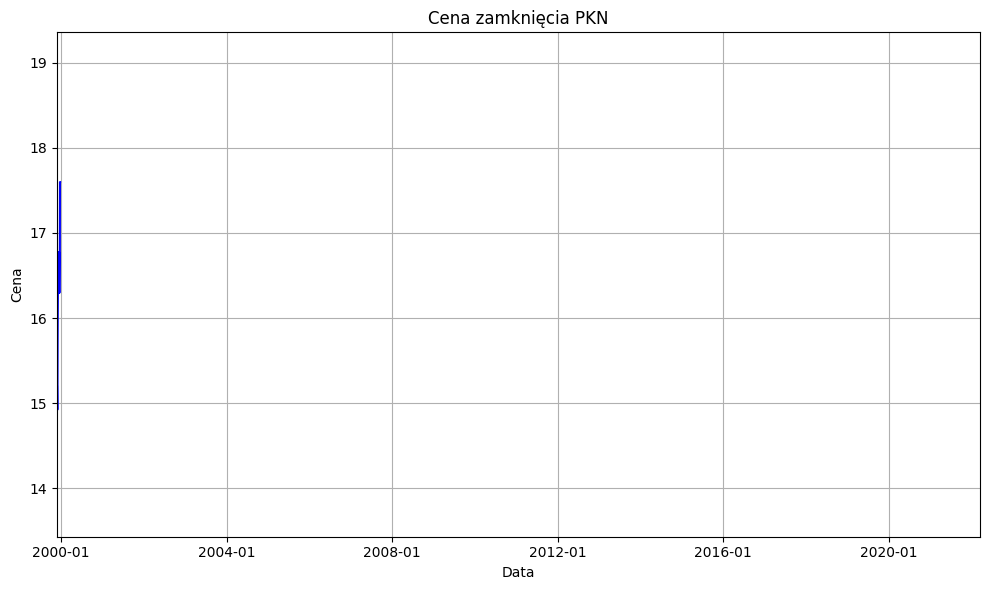

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.dates import DateFormatter

df = pd.read_csv('/content/pkn.txt')
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')

dates = df['<DATE>'].values
prices = df['<CLOSE>'].values

fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], 'b-')
ax.set_xlim(dates[0], dates[-1])
ax.set_ylim(min(prices)*0.9, max(prices)*1.1)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.grid(True)
ax.set_title('Cena zamknięcia PKN')
ax.set_xlabel('Data')
ax.set_ylabel('Cena')
def animate(i):

    x = dates[:20+i*5]
    y = prices[:20+i*5]
    line.set_data(x, y)
    ax.set_ylim(min(y)*0.9, max(y)*1.1)
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=len(dates)//5, interval=200, blit=True)

plt.tight_layout()
plt.show()


zadanie 3

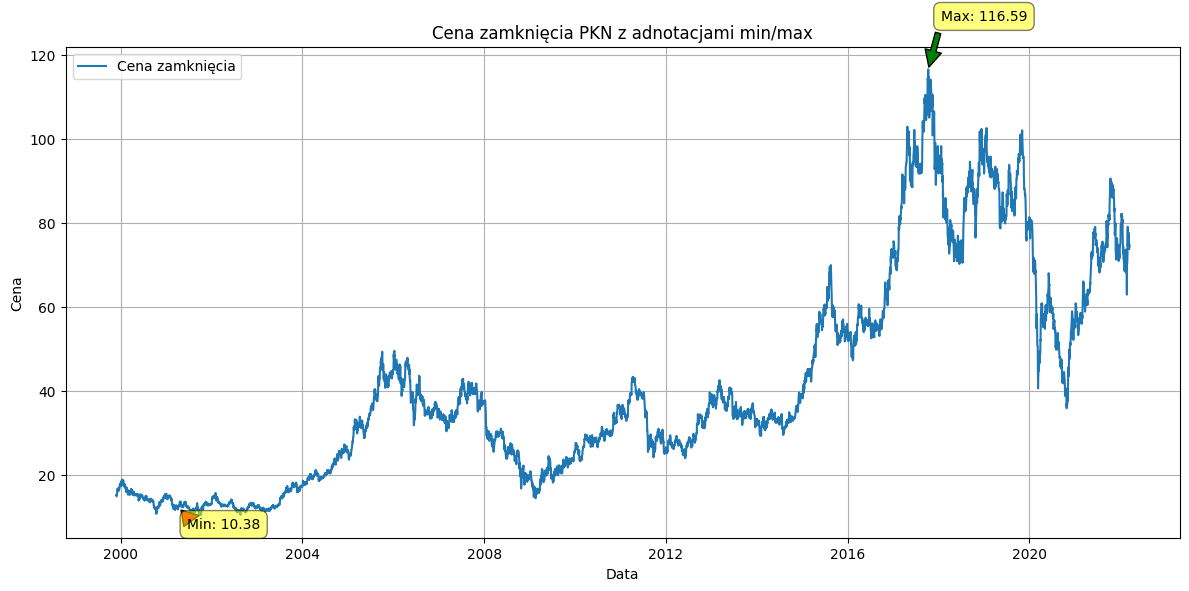

In [7]:
df = pd.read_csv('/content/pkn.txt')
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')
plt.figure(figsize=(12, 6))
plt.plot(df['<DATE>'], df['<CLOSE>'], label='Cena zamknięcia')
min_idx = df['<CLOSE>'].idxmin()
max_idx = df['<CLOSE>'].idxmax()
plt.annotate(
    f"Min: {df.loc[min_idx, '<CLOSE>']:.2f}",
    xy=(df.loc[min_idx, '<DATE>'], df.loc[min_idx, '<CLOSE>']),
    xytext=(df.loc[min_idx, '<DATE>'] - pd.Timedelta(days=100),
            df.loc[min_idx, '<CLOSE>'] * 0.7),
    arrowprops=dict(facecolor='red', shrink=0.05),
    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
)

plt.annotate(
    f"Max: {df.loc[max_idx, '<CLOSE>']:.2f}",
    xy=(df.loc[max_idx, '<DATE>'], df.loc[max_idx, '<CLOSE>']),
    xytext=(df.loc[max_idx, '<DATE>'] + pd.Timedelta(days=100),
            df.loc[max_idx, '<CLOSE>'] * 1.1),
    arrowprops=dict(facecolor='green', shrink=0.05),
    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
)

plt.title('Cena zamknięcia PKN z adnotacjami min/max')
plt.xlabel('Data')
plt.ylabel('Cena')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

zadanie 4

In [8]:
import pandas as pd
df = pd.read_csv('/content/pkn.txt')
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')
df['Year'] = df['<DATE>'].dt.year
df['Month'] = df['<DATE>'].dt.month
grouped = df.groupby(['Year', 'Month']).agg({'<CLOSE>': ['min', 'max']})
grouped.columns = ['Close_Min', 'Close_Max']
grouped = grouped.reset_index()

def style_close(val):
    if val == grouped['Close_Min'].min():
        return 'background-color: red; color: white'
    elif val == grouped['Close_Max'].max():
        return 'background-color: green; color: white'
    return ''

styled_df = grouped.style\
    .applymap(style_close, subset=['Close_Min', 'Close_Max'])\
    .format({
        'Close_Min': '{:.2f}',
        'Close_Max': '{:.2f}',
        'Year': '{:.0f}',
        'Month': '{:.0f}'
    })\
    .set_caption('Minimalne i maksymalne ceny zamknięcia PKN wg miesięcy')\
    .set_properties(**{'text-align': 'center'})

styled_df

<ipython-input-8-55a248c3c37e>:18: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(style_close, subset=['Close_Min', 'Close_Max'])\


,Year,Month,Close_Min,Close_Max
0,1999,11,14.92,15.19
1,1999,12,15.67,17.95
2,2000,1,17.26,18.91
3,2000,2,15.33,17.81
4,2000,3,15.27,16.71
5,2000,4,15.12,16.09
6,2000,5,13.96,15.54
7,2000,6,14.23,15.40
8,2000,7,13.89,15.06
9,2000,8,13.48,14.37
